In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
file_path = '/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz'

In [2]:
import pandas as pd 
df = pd.read_csv(file_path, nrows=200000, low_memory=False)
df.shape

(200000, 151)

In [3]:
df.info()
df.head()
df['loan_status'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 230.4+ MB


loan_status
Fully Paid            140992
Charged Off            35090
Current                22637
Late (31-120 days)       785
In Grace Period          347
Late (16-30 days)        148
Default                    1
Name: count, dtype: int64

In [4]:
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 151 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    id                                          200000 non-null  int64  
 1    member_id                                   0 non-null       float64
 2    loan_amnt                                   200000 non-null  float64
 3    funded_amnt                                 200000 non-null  float64
 4    funded_amnt_inv                             200000 non-null  float64
 5    term                                        200000 non-null  object 
 6    int_rate                                    200000 non-null  float64
 7    installment                                 200000 non-null  float64
 8    grade                                       200000 non-null  object 
 9    sub_grade                                   200000 non-nu

In [6]:
df.isnull().sum()

id                            0
member_id                200000
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        194160
settlement_date          194160
settlement_amount        194160
settlement_percentage    194160
settlement_term          194160
Length: 151, dtype: int64

In [7]:
print(df['loan_status'].value_counts(normalize=True))

loan_status
Fully Paid            0.704960
Charged Off           0.175450
Current               0.113185
Late (31-120 days)    0.003925
In Grace Period       0.001735
Late (16-30 days)     0.000740
Default               0.000005
Name: proportion, dtype: float64


In [8]:
print(f"Original shape: {df.shape}")

## --------------------------------------------------------------------
## Step 1: Drop Unwanted Columns
## --------------------------------------------------------------------

cols_to_drop_missing = [
    'member_id',
    'desc',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'revol_bal_joint',
    
    # All 'sec_app_' columns
    'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
    'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
    
    # All 'hardship_' columns
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term',
    'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
    'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    
    # All 'settlement_' columns
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount',
    'settlement_percentage', 'settlement_term',
    
    # Other high-missing (>80%) columns
    'mths_since_last_record',
    'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    'inq_fi', 'total_cu_tl', 'inq_last_12m',
    'mths_since_last_major_derog'
]

# Group 2: Irrelevant, Redundant, or High Cardinality Text
cols_to_drop_irrelevant = [
    'id',                     
    'url',                    
    'emp_title',              
    'title',                  
    'zip_code',               
    'addr_state'              
]

# Group 3: Data Leakage

cols_to_drop_leakage = [
    'out_prncp',              
    'out_prncp_inv',          
    'total_pymnt',            
    'total_pymnt_inv',        
    'total_rec_prncp',        
    'total_rec_int',          
    'total_rec_late_fee',     
    'recoveries',             
    'collection_recovery_fee',
    'last_pymnt_d',           
    'last_pymnt_amnt',        
    'next_pymnt_d',           
    'last_credit_pull_d',     
    'last_fico_range_high',   
    'last_fico_range_low',    
]

# Group 4: Likely single-value or non-predictive
cols_to_drop_other = [
    'pymnt_plan',             
    'policy_code',            
    'disbursement_method'     
]

# Combine all lists into one
all_cols_to_drop = (
    cols_to_drop_missing +
    cols_to_drop_irrelevant +
    cols_to_drop_leakage +
    cols_to_drop_other
)

# Use set() to remove any duplicates, just in case
all_cols_to_drop = list(set(all_cols_to_drop))


df_cleaned = df.drop(columns=all_cols_to_drop, errors='ignore')

print(f"Shape after dropping columns: {df_cleaned.shape}")

## --------------------------------------------------------------------
## Step 2: Filter Rows and Define Target Variable ('is_default')
## --------------------------------------------------------------------


terminal_statuses = ['Fully Paid', 'Charged Off', 'Default']

df_model_data = df_cleaned[df_cleaned['loan_status'].isin(terminal_statuses)].copy()

# Creating the binary target variable
# 0 = Good Loan (Fully Paid)
# 1 = Bad Loan (Defaulted or Charged Off)
status_map = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1
}

df_model_data['is_default'] = df_model_data['loan_status'].map(status_map)


# We also drop 'debt_settlement_flag' as it's a form of data leakage
df_model_data = df_model_data.drop(columns=['loan_status', 'debt_settlement_flag'], errors='ignore')

# --- Final Check ---
print(f"Final shape for modeling: {df_model_data.shape}")
print("\nNew Target Variable Distribution:")
print(df_model_data['is_default'].value_counts(normalize=True))

Original shape: (200000, 151)
Shape after dropping columns: (200000, 72)
Final shape for modeling: (176083, 71)

New Target Variable Distribution:
is_default
0    0.800713
1    0.199287
Name: proportion, dtype: float64


In [9]:
# Get a list of remaining columns
remaining_cols = df_model_data.columns.tolist()
print(f"Total columns remaining: {len(remaining_cols)}")

# Calculate missing data
missing_data = df_model_data.isnull().sum()
missing_percent = (missing_data / len(df_model_data)) * 100
missing_report = pd.DataFrame({'count': missing_data, 'percent': missing_percent})

# Show only columns that still have missing data
print("\n--- Remaining Missing Data Report ---")
print(missing_report[missing_report['count'] > 0].sort_values(by='percent', ascending=False))

Total columns remaining: 71

--- Remaining Missing Data Report ---
                                 count    percent
mths_since_recent_bc_dlq        131063  74.432512
mths_since_recent_revol_delinq  112796  64.058427
mths_since_last_delinq           85273  48.427730
mths_since_recent_inq            18734  10.639301
emp_length                       11134   6.323154
num_tl_120dpd_2m                  9984   5.670053
mo_sin_old_il_acct                5260   2.987228
percent_bc_gt_75                  1835   1.042122
bc_util                           1797   1.020541
bc_open_to_buy                    1676   0.951824
mths_since_recent_bc              1617   0.918317
revol_util                          69   0.039186
dti                                  2   0.001136
num_rev_accts                        1   0.000568


In [10]:
## --------------------------------------------------------------------
## Step 1: Drop columns with > 40% missing data
## --------------------------------------------------------------------
cols_to_drop_high_missing = [
    'mths_since_recent_bc_dlq',
    'mths_since_recent_revol_delinq',
    'mths_since_last_delinq'
]

# We can also add this one, as 11% is still quite high
cols_to_drop_high_missing.append('mths_since_recent_inq')

df_model_data = df_model_data.drop(columns=cols_to_drop_high_missing, errors='ignore')

print(f"Dropped {len(cols_to_drop_high_missing)} high-missing columns.")


## --------------------------------------------------------------------
## Step 2: Plan for Imputing the Rest
## --------------------------------------------------------------------

# Strategy for remaining missing columns:
# - emp_length: Impute with '0' or mode (which we already did).
# - num_tl_120dpd_2m: Impute with median (0).
# - mo_sin_old_il_acct: Impute with median.
# - percent_bc_gt_75: Impute with median.
# - bc_util: Impute with median.
# - bc_open_to_buy: Impute with median.
# - mths_since_recent_bc: Impute with median.
# - revol_util: Impute with median.
# - dti: Impute with median.
# - num_rev_accts: Impute with median.

# Let's just fill the last few rows with < 0.1% missing data to simplify the EDA
df_model_data['dti'] = df_model_data['dti'].fillna(df_model_data['dti'].median())
df_model_data['revol_util'] = df_model_data['revol_util'].fillna(df_model_data['revol_util'].median())
df_model_data['num_rev_accts'] = df_model_data['num_rev_accts'].fillna(df_model_data['num_rev_accts'].median())

print("Filled trivial missing values (dti, revol_util, etc.)")


Dropped 4 high-missing columns.
Filled trivial missing values (dti, revol_util, etc.)


In [11]:
df_model_data.shape

(176083, 67)

In [12]:
import numpy as np

In [13]:
# Create a mapping for ordinal encoding
emp_length_map = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,
    np.nan: 0  
}

df_model_data['emp_length_int'] = df_model_data['emp_length'].map(emp_length_map)
df_model_data = df_model_data.drop(columns=['emp_length'])

print("Cleaned 'emp_length' and created 'emp_length_int'")

Cleaned 'emp_length' and created 'emp_length_int'


In [14]:
# Convert to datetime objects. Errors='coerce' will turn any bad dates into NaT (Not a Time)
df_model_data['issue_d'] = pd.to_datetime(df_model_data['issue_d'], errors='coerce')
df_model_data['earliest_cr_line'] = pd.to_datetime(df_model_data['earliest_cr_line'], errors='coerce')

# Engineer the new feature (in months)
df_model_data['credit_history_length_mths'] = ((df_model_data['issue_d'] - df_model_data['earliest_cr_line']).dt.days / 30).astype(float)

# Drop the original date columns
df_model_data = df_model_data.drop(columns=['issue_d', 'earliest_cr_line'])

print("Engineered 'credit_history_length_mths'")

Engineered 'credit_history_length_mths'


/tmp/ipykernel_37/3515324993.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_model_data['issue_d'] = pd.to_datetime(df_model_data['issue_d'], errors='coerce')
/tmp/ipykernel_37/3515324993.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_model_data['earliest_cr_line'] = pd.to_datetime(df_model_data['earliest_cr_line'], errors='coerce')


## Analysis

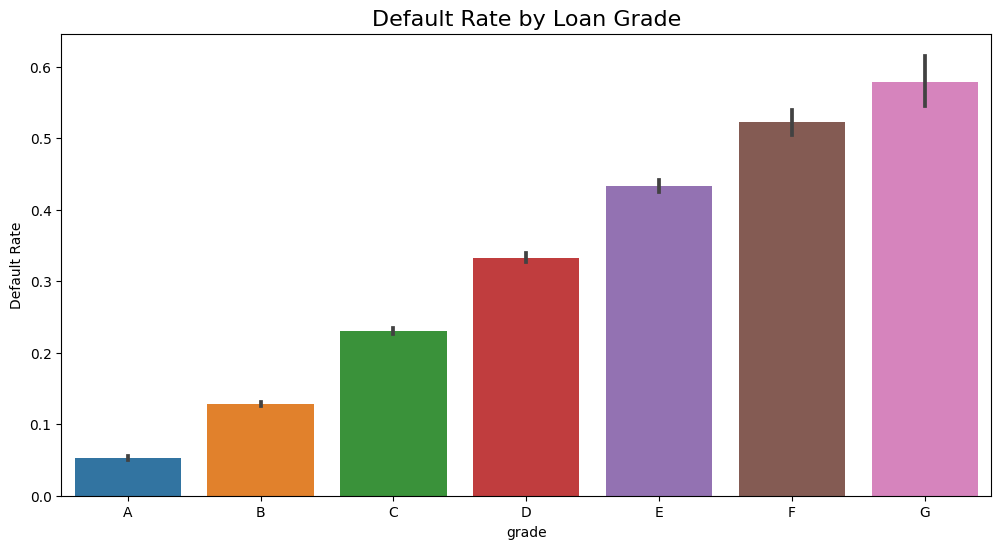

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_model_data, 
    x='grade', 
    y='is_default', 
    order=sorted(df_model_data['grade'].unique())
)
plt.title('Default Rate by Loan Grade', fontsize=16)
plt.ylabel('Default Rate')
plt.show()

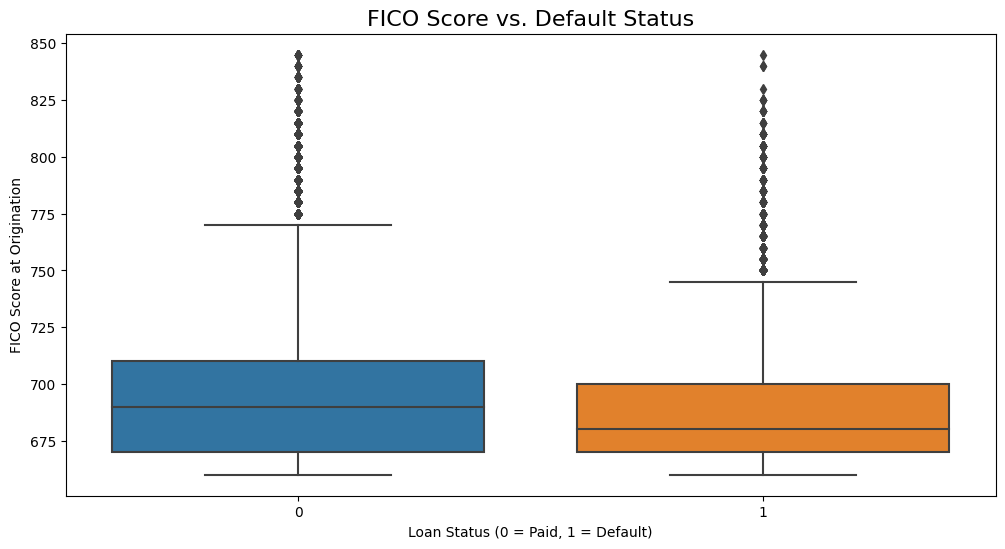

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_model_data, x='is_default', y='fico_range_low')
plt.title('FICO Score vs. Default Status', fontsize=16)
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('FICO Score at Origination')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


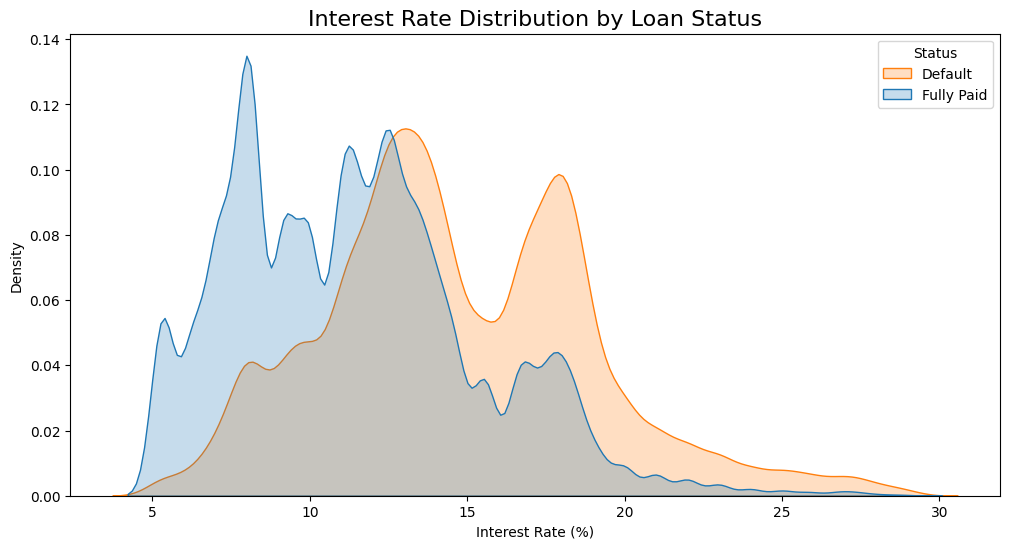

In [17]:
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_model_data, 
    x='int_rate', 
    hue='is_default', 
    fill=True, 
    common_norm=False
)
plt.title('Interest Rate Distribution by Loan Status', fontsize=16)
plt.xlabel('Interest Rate (%)')
plt.legend(title='Status', labels=['Default', 'Fully Paid'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


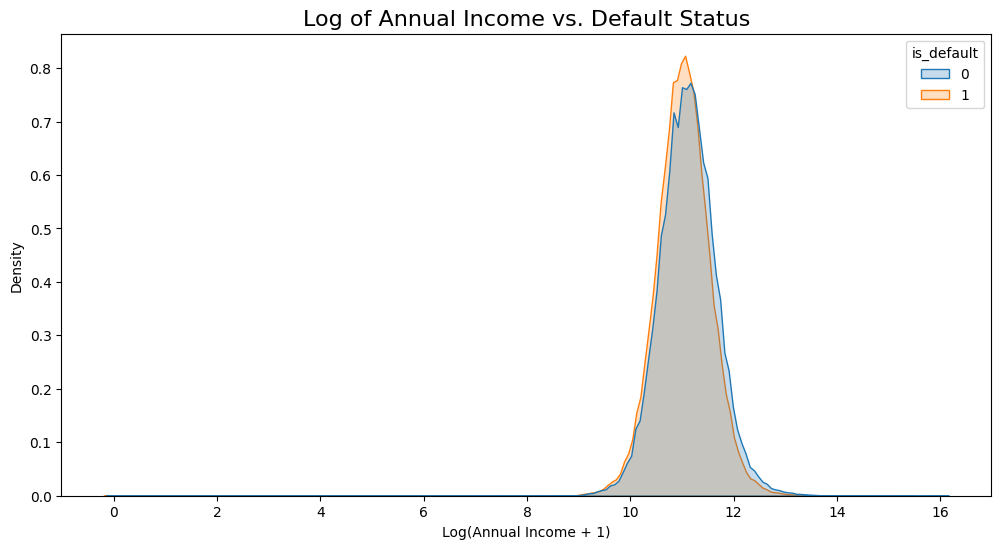

In [18]:
# Use log of income for better visualization, as it's heavily skewed
df_model_data['log_annual_inc'] = np.log1p(df_model_data['annual_inc'])

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_model_data, 
    x='log_annual_inc', 
    hue='is_default', 
    fill=True, 
    common_norm=False
)
plt.title('Log of Annual Income vs. Default Status', fontsize=16)
plt.xlabel('Log(Annual Income + 1)')
plt.show()


--- Top 20 Features Correlated with Default ---
is_default              1.000000
int_rate                0.308953
acc_open_past_24mths    0.135309
dti                     0.114735
num_tl_op_past_12m      0.114159
inq_last_6mths          0.090924
num_rev_tl_bal_gt_0     0.076565
num_actv_rev_tl         0.075535
loan_amnt               0.066746
funded_amnt             0.066746
funded_amnt_inv         0.066516
revol_util              0.053597
num_op_rev_tl           0.046658
num_actv_bc_tl          0.043091
num_sats                0.042540
open_acc                0.042537
installment             0.033814
pub_rec_bankruptcies    0.033777
pub_rec                 0.028554
num_il_tl               0.028418
Name: is_default, dtype: float64

--- Top 20 Features Correlated with Paying ---
total_bal_ex_mort             0.001477
num_bc_tl                     0.000031
tot_coll_amt                 -0.002441
pct_tl_nvr_dlq               -0.003704
emp_length_int               -0.022966
revol_bal      

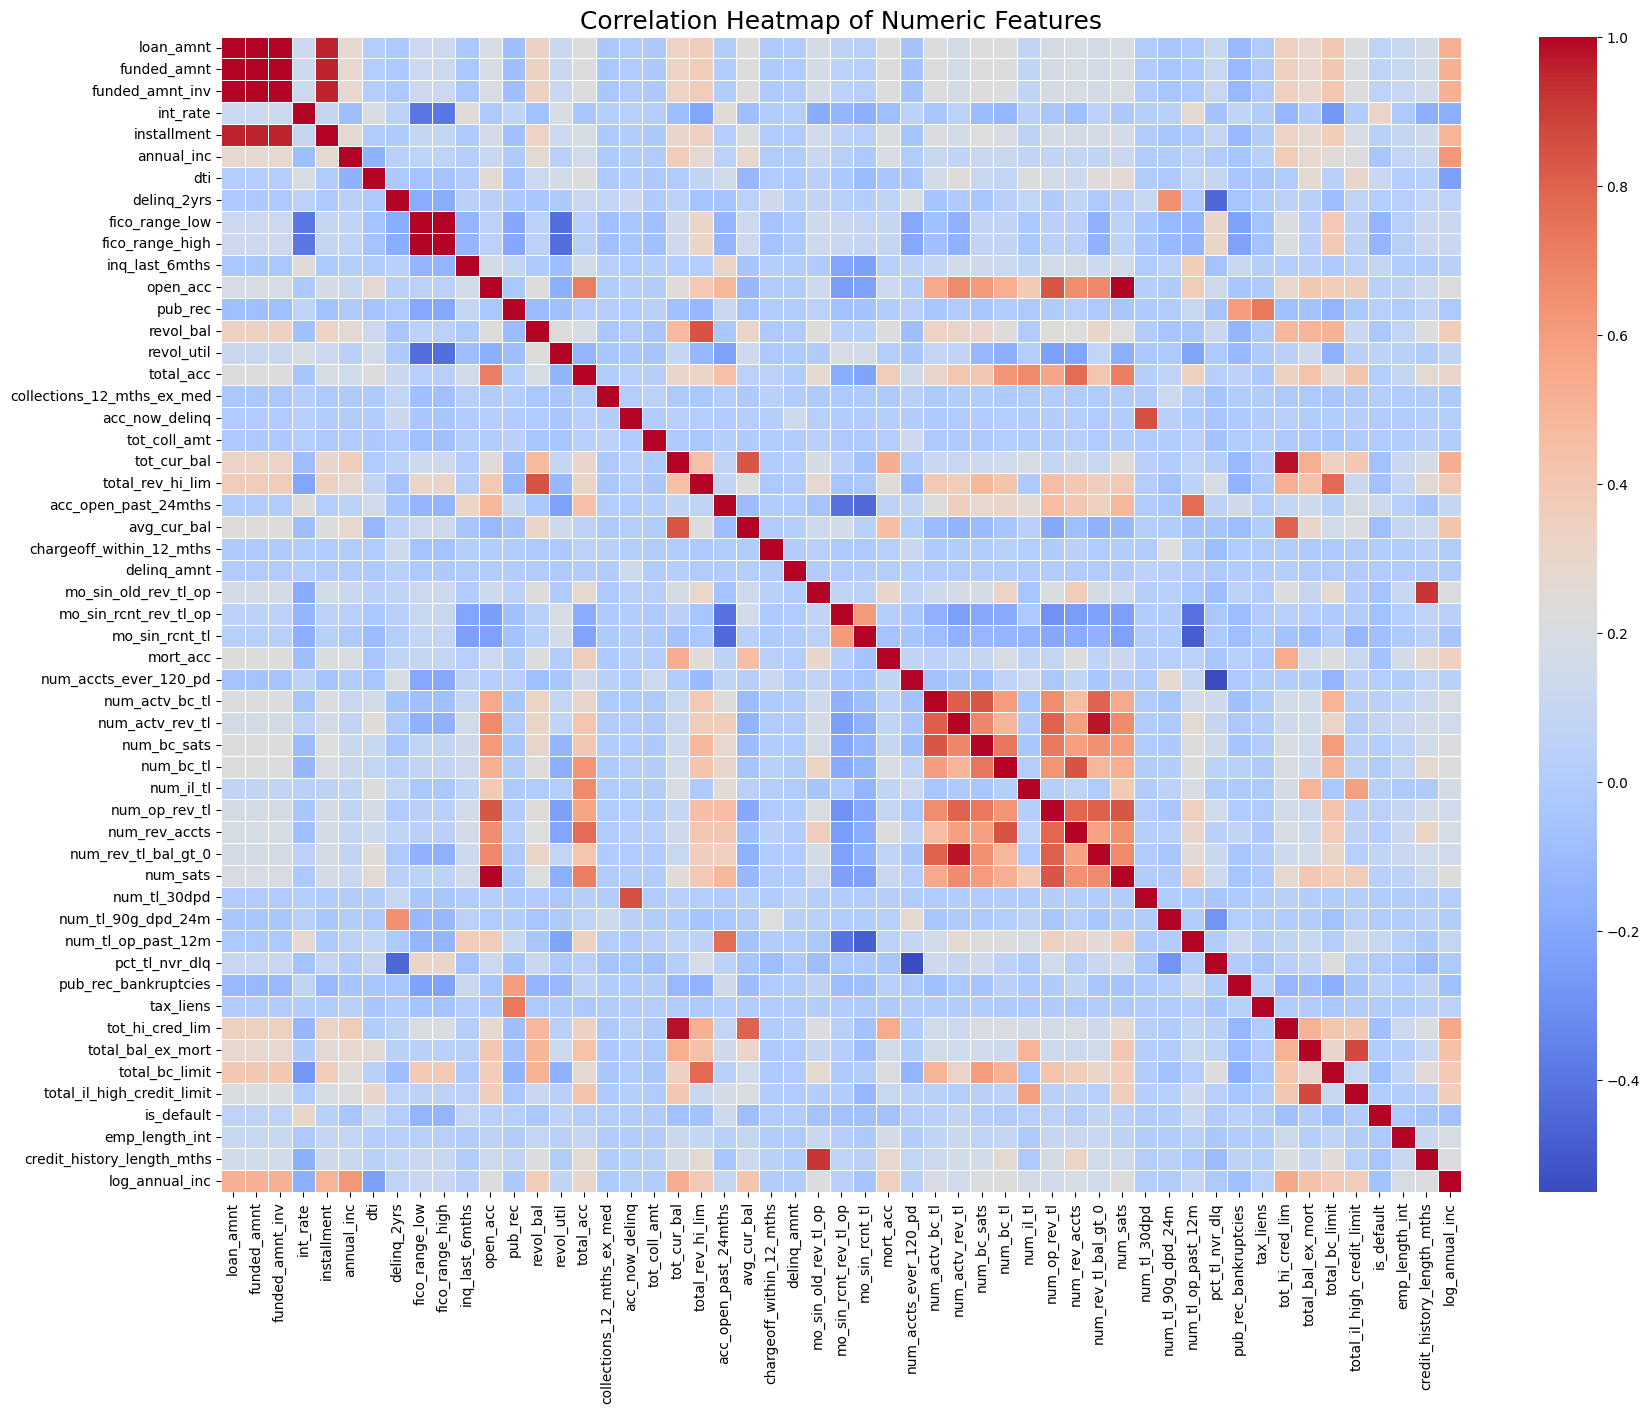

In [19]:
# Select only the numeric columns for correlation
numeric_cols = df_model_data.select_dtypes(include=[np.number])

# Drop any remaining columns with too many NaNs for a clean plot
numeric_cols = numeric_cols.dropna(axis=1, how='any') 

# Calculate correlation
corr_matrix = numeric_cols.corr()

# Focus on correlations with our target variable
corr_target = corr_matrix['is_default'].sort_values(ascending=False)
print("\n--- Top 20 Features Correlated with Default ---")
print(corr_target.head(20))
print("\n--- Top 20 Features Correlated with Paying ---")
print(corr_target.tail(20))

# Plot the full heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=18)
plt.show()

In [20]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

X_num = df_model_data.select_dtypes(include=['float64', 'int64'])
y = df_model_data['is_default']

mi_scores = mutual_info_classif(X_num.fillna(0), y)
mi = pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)
mi.head(15)

is_default              0.504049
int_rate                0.049349
installment             0.042455
fico_range_low          0.013558
fico_range_high         0.011276
acc_open_past_24mths    0.010840
num_tl_op_past_12m      0.010324
loan_amnt               0.009887
funded_amnt_inv         0.009720
dti                     0.007662
funded_amnt             0.007639
percent_bc_gt_75        0.007172
inq_last_6mths          0.007076
pct_tl_nvr_dlq          0.006831
emp_length_int          0.006730
dtype: float64

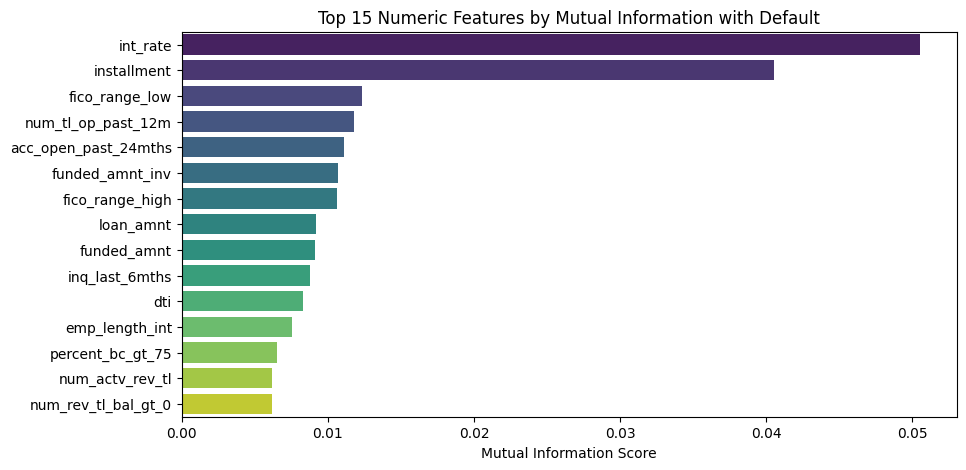

✅ Top 10 features by Mutual Information:
int_rate                0.050505
installment             0.040557
fico_range_low          0.012358
num_tl_op_past_12m      0.011788
acc_open_past_24mths    0.011079
funded_amnt_inv         0.010693
fico_range_high         0.010659
loan_amnt               0.009209
funded_amnt             0.009108
inq_last_6mths          0.008751
dtype: float64

✅ Top Categorical Features by Information Value (IV):
grade                  0.614577
term                   0.315453
verification_status    0.061808
home_ownership         0.028002
purpose                0.023458
initial_list_status    0.005309
application_type       0.000188
dtype: float64


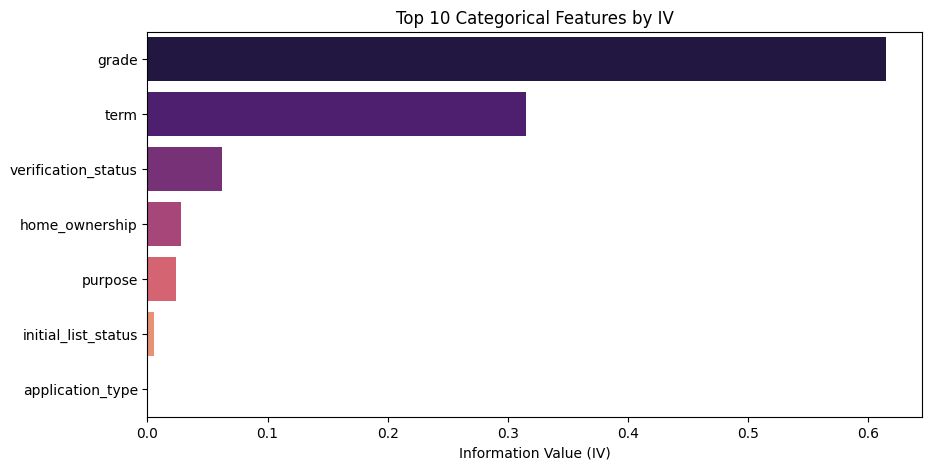


📊 Top Skewed Features:
delinq_amnt                 74.689066
tot_coll_amt                50.642852
annual_inc                  49.254778
tax_liens                   43.857888
num_tl_120dpd_2m            43.731261
num_tl_30dpd                20.575559
chargeoff_within_12_mths    17.818906
pub_rec                     17.107669
acc_now_delinq              16.971799
num_tl_90g_dpd_24m          11.807849
dtype: float64


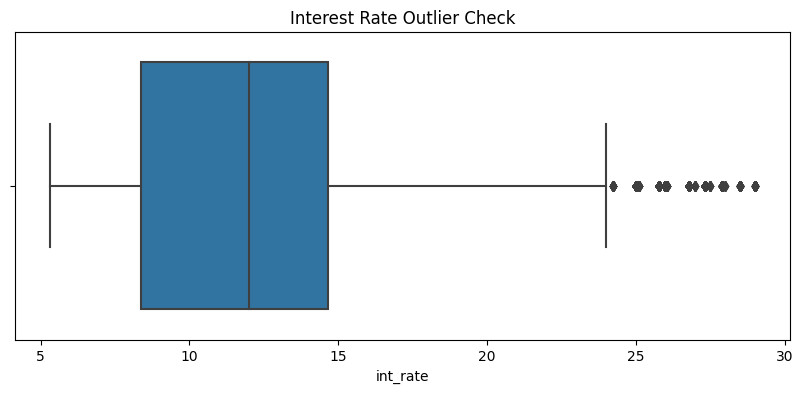

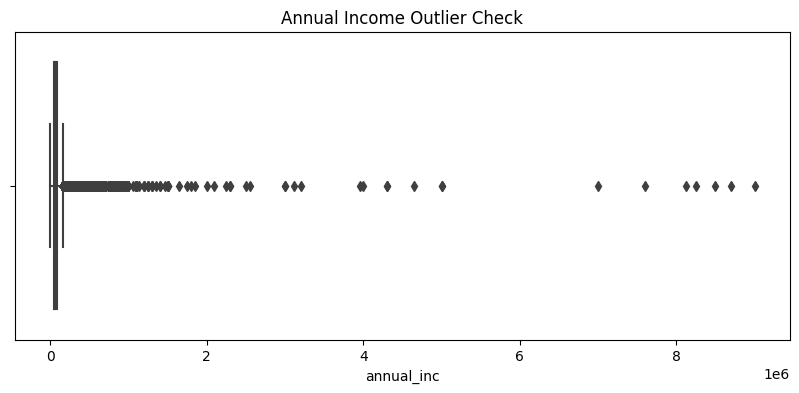


⚖️ Class Distribution:
is_default
0    0.800713
1    0.199287
Name: proportion, dtype: float64


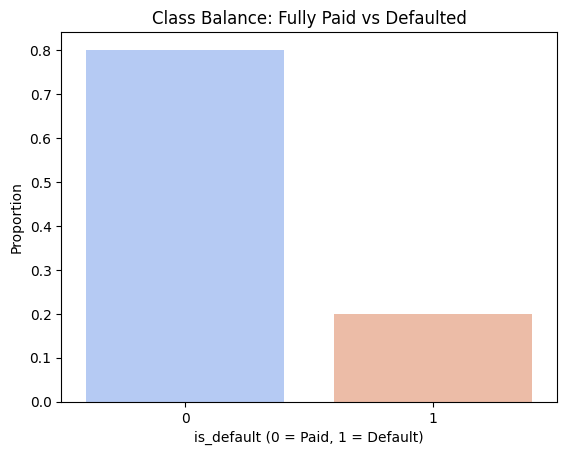

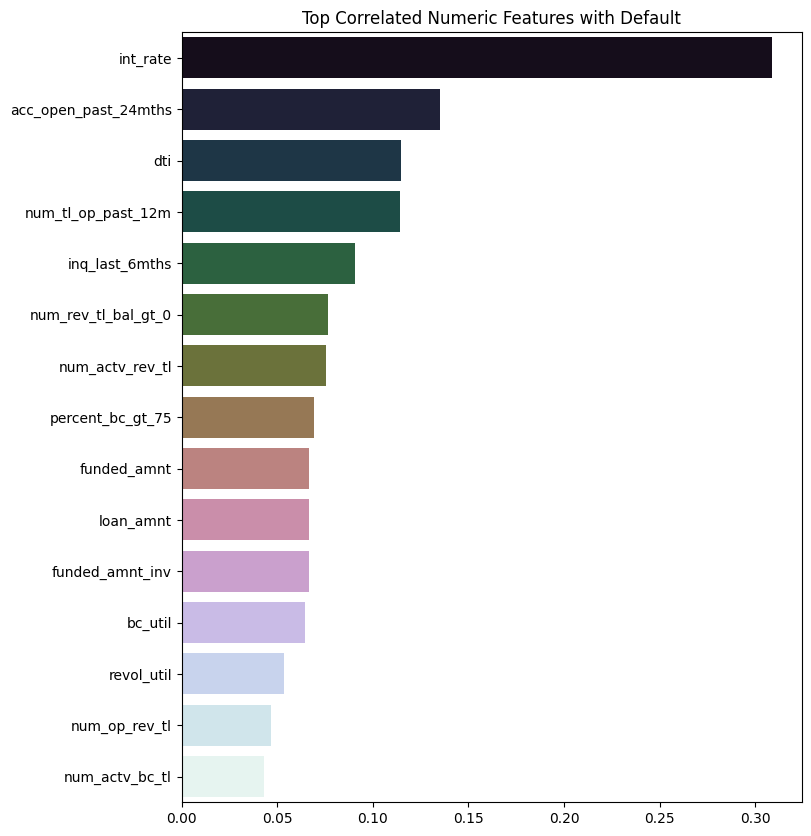

✅ Advanced EDA completed successfully!


In [21]:
# ============================================
# 🔍 ADVANCED EDA & FEATURE INSIGHTS
# ============================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Ensure no NaN in target
df_model_data = df_model_data.dropna(subset=['is_default'])

# ============================================
# 1️⃣ Mutual Information for Numeric Features
# ============================================
num_cols = df_model_data.select_dtypes(include=['float64', 'int64']).columns.drop('is_default', errors='ignore')

X_num = df_model_data[num_cols].fillna(0)
y = df_model_data['is_default']

mi_scores = mutual_info_classif(X_num, y, random_state=42)
mi = pd.Series(mi_scores, index=num_cols).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=mi.head(15).values, y=mi.head(15).index, palette='viridis')
plt.title('Top 15 Numeric Features by Mutual Information with Default')
plt.xlabel('Mutual Information Score')
plt.show()

print("✅ Top 10 features by Mutual Information:")
print(mi.head(10))

# ============================================
# 2️⃣ Information Value (IV) for Categorical Features
# ============================================

def calc_iv(df, feature, target):
    lst = []
    for val in df[feature].dropna().unique():
        all_count = df[df[feature] == val].shape[0]
        good = df[(df[feature] == val) & (df[target] == 0)].shape[0]
        bad = df[(df[feature] == val) & (df[target] == 1)].shape[0]
        if good == 0 or bad == 0:
            continue
        lst.append({
            'Value': val,
            'Good': good,
            'Bad': bad
        })
    iv_df = pd.DataFrame(lst)
    iv_df['Good Dist'] = iv_df['Good'] / iv_df['Good'].sum()
    iv_df['Bad Dist'] = iv_df['Bad'] / iv_df['Bad'].sum()
    iv_df['IV'] = (iv_df['Good Dist'] - iv_df['Bad Dist']) * np.log(iv_df['Good Dist'] / iv_df['Bad Dist'])
    return iv_df['IV'].sum()

cat_cols = df_model_data.select_dtypes(include=['object', 'category']).columns
iv_values = {col: calc_iv(df_model_data, col, 'is_default') for col in cat_cols if df_model_data[col].nunique() < 20}

iv_sorted = pd.Series(iv_values).sort_values(ascending=False)
print("\n✅ Top Categorical Features by Information Value (IV):")
print(iv_sorted.head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=iv_sorted.head(10).values, y=iv_sorted.head(10).index, palette='magma')
plt.title('Top 10 Categorical Features by IV')
plt.xlabel('Information Value (IV)')
plt.show()

# ============================================
# 3️⃣ Skewness Check & Log Transformation
# ============================================
skewed = df_model_data[num_cols].skew().sort_values(ascending=False)
print("\n📊 Top Skewed Features:")
print(skewed.head(10))

# Example: Log-transform highly skewed features
for col in ['annual_inc', 'revol_bal', 'loan_amnt']:
    if col in df_model_data.columns:
        df_model_data['log_' + col] = np.log1p(df_model_data[col])

# ============================================
# 4️⃣ Outlier Visualization (Example Features)
# ============================================
plt.figure(figsize=(10,4))
sns.boxplot(x=df_model_data['int_rate'])
plt.title('Interest Rate Outlier Check')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df_model_data['annual_inc'])
plt.title('Annual Income Outlier Check')
plt.show()

# Optional: C
for col in ['annual_inc', 'revol_bal', 'loan_amnt']:
    if col in df_model_data.columns:
        df_model_data[col] = df_model_data[col].clip(upper=df_model_data[col].quantile(0.99))

# ============================================
# 5️⃣ Temporal Drift (Default Rate Over Time)
# ============================================
if 'issue_d' in df_model_data.columns:
    df_model_data['issue_year'] = pd.to_datetime(df_model_data['issue_d']).dt.year
    default_rate_by_year = df_model_data.groupby('issue_year')['is_default'].mean()
    default_rate_by_year.plot(kind='line', marker='o', figsize=(8,4))
    plt.title('Default Rate by Issue Year')
    plt.ylabel('Default Rate')
    plt.show()

# ============================================
# 6️⃣ Class Imbalance Check
# ============================================
class_dist = df_model_data['is_default'].value_counts(normalize=True)
print("\n⚖️ Class Distribution:")
print(class_dist)

sns.barplot(x=class_dist.index, y=class_dist.values, palette='coolwarm')
plt.title('Class Balance: Fully Paid vs Defaulted')
plt.ylabel('Proportion')
plt.xlabel('is_default (0 = Paid, 1 = Default)')
plt.show()

# ============================================
# 7️⃣ Correlation Heatmap (for numeric subset)
# ============================================
corr = df_model_data[num_cols].corrwith(df_model_data['is_default']).sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=corr.head(15).values, y=corr.head(15).index, palette='cubehelix')
plt.title('Top Correlated Numeric Features with Default')
plt.show()

print("✅ Advanced EDA completed successfully!")


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, metrics, regularizers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    f1_score, 
    precision_recall_curve,
    precision_score,  
    recall_score      
)

# ----------------------------------------------------------------------------
# === STEP 1: INITIAL DATA CLEANING (Pandas-based) ===
# ----------------------------------------------------------------------------

def load_and_clean_data(df):
    """
    Applies all the 'Type 1' data cleaning: dropping columns,
    filtering rows, and creating the target variable.
    """
    print("Starting data cleaning...")
    original_rows = len(df)
    
    # --- Column Dropping ---
    cols_to_drop_missing = [
        'member_id', 'desc', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
        'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 
        'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
        'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 
        'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
        'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
        'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 
        'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
        'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
        'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
        'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
        'settlement_amount', 'settlement_percentage', 'settlement_term',
        'mths_since_last_record', 'open_acc_6m', 'open_act_il', 'open_il_12m', 
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
        'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'mths_since_last_major_derog'
    ]
    cols_to_drop_irrelevant = ['id', 'url', 'emp_title', 'title', 'zip_code', 'addr_state']
    cols_to_drop_leakage = [
        'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
        'last_fico_range_high', 'last_fico_range_low', 'debt_settlement_flag'
    ]
    cols_to_drop_other = ['pymnt_plan', 'policy_code', 'disbursement_method']
    cols_to_drop_high_missing = [
        'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 
        'mths_since_last_delinq', 'mths_since_recent_inq'
    ]
    
    all_cols_to_drop = list(set(
        cols_to_drop_missing + cols_to_drop_irrelevant + 
        cols_to_drop_leakage + cols_to_drop_other + cols_to_drop_high_missing
    ))
    
    df_cleaned = df.drop(columns=all_cols_to_drop, errors='ignore')
    print(f"Dropped {len(all_cols_to_drop)} columns.")

    # --- Row Filtering & Target Creation ---
    terminal_statuses = ['Fully Paid', 'Charged Off', 'Default']
    df_model = df_cleaned[df_cleaned['loan_status'].isin(terminal_statuses)].copy()
    
    status_map = {'Fully Paid': 0, 'Charged Off': 1, 'Default': 1}
    df_model['is_default'] = df_model['loan_status'].map(status_map)
    df_model = df_model.drop(columns=['loan_status'])
    
    print(f"Filtered rows: {original_rows} -> {len(df_model)}")
    return df_model

# ----------------------------------------------------------------------------
# === STEP 2: FEATURE ENGINEERING ===
# ----------------------------------------------------------------------------

def engineer_features(df):
    """
    Creates new features from existing ones.
    This happens *before* the split, as it's row-by-row.
    """
    print("Engineering features...")
    
    # 1. 'emp_length' -> 'emp_length_int'
    emp_length_map = {
        '10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7,
        '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3,
        '2 years': 2, '1 year': 1, '< 1 year': 0
        # NaNs will be left as NaNs and handled by the imputer
    }
    df['emp_length_int'] = df['emp_length'].map(emp_length_map)
    df = df.drop(columns=['emp_length'])

    # 2. 'issue_d', 'earliest_cr_line' -> 'credit_history_length_mths'
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
    df['credit_history_length_mths'] = ((df['issue_d'] - df['earliest_cr_line']).dt.days / 30).astype(float)
    
    # Replace negative or zero values with NaN to be imputed
    df['credit_history_length_mths'] = df['credit_history_length_mths'].apply(lambda x: x if x > 0 else np.nan)
    df = df.drop(columns=['issue_d', 'earliest_cr_line'])

    print("Engineering NEW interaction features...")
    
    # Use log1p to avoid division by zero
    df['log_annual_inc'] = np.log1p(df['annual_inc'])
    
    # 1. Loan-to-Income Ratio: How much is the loan vs. their income?
    df['loan_to_income_ratio'] = df['loan_amnt'] / (df['log_annual_inc'] + 1e-6)
    
    # 2. Debt-to-Income (DTI) vs. FICO: Is high debt *also* low credit?
    df['dti_x_fico'] = df['dti'] * df['fico_range_low']
    
    # 3. Total Installment vs. Income: What % of their monthly income is this payment?
    # annual_inc / 12 = approx monthly income
    df['installment_to_income_ratio'] = df['installment'] / (df['annual_inc'] / 12 + 1e-6)

    # 4. Revolving Utilization vs. FICO
    df['revol_util_x_fico'] = df['revol_util'] * df['fico_range_low']
    
    return df

# ----------------------------------------------------------------------------
# === STEP 3: MODEL PREPROCESSING (Scikit-Learn Pipeline) ===
# ----------------------------------------------------------------------------

def build_preprocessor(X_train):
    """
    Creates the ColumnTransformer pipeline based on our EDA.
    This will handle all imputation, scaling, and encoding.
    """
    print("Building preprocessing pipeline...")
    
    # --- Define Feature Lists ---
    log_transform_features = [
        'annual_inc', 'tot_coll_amt', 'delinq_amnt', 'tax_liens', 
        'pub_rec', 'revol_bal', 'tot_cur_bal'
    ]
    
    # All other numeric features, including engineered ones
    numeric_features = [
        'loan_amnt', 'funded_amnt', 'installment', 'fico_range_low', 
        'num_tl_op_past_12m',  
        'acc_open_past_24mths', 'inq_last_6mths', 'dti', 
        'revol_util', 'open_acc', 'mort_acc', 'bc_util', 'emp_length_int', 
        'credit_history_length_mths', 'avg_cur_bal', 'bc_open_to_buy', 
        'chargeoff_within_12_mths', 'delinq_2yrs', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
        'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
        'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
        'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
        'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
        'pct_tl_nvr_dlq', 'percent_bc_gt_75',
        'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort',
        'total_bc_limit', 'total_il_high_credit_limit', 'total_acc', 'total_rev_hi_lim','log_annual_inc',
        'loan_to_income_ratio','dti_x_fico','installment_to_income_ratio','revol_util_x_fico'
    ]
    
    categorical_features = ['verification_status', 'home_ownership', 'purpose', 'initial_list_status', 'application_type']
    ordinal_features = ['grade', 'sub_grade', 'term']

    # --- Clean lists ---
    existing_cols = X_train.columns
    log_transform_features = [c for c in log_transform_features if c in existing_cols]
    numeric_features = [c for c in numeric_features if c in existing_cols]
    categorical_features = [c for c in categorical_features if c in existing_cols]
    ordinal_features = [c for c in ordinal_features if c in existing_cols]
    
    # --- Get categories for ordinal features FROM THE TRAINING SET ---
    # Use dropna() to handle potential NaNs before finding unique values
    grade_cats = sorted(X_train['grade'].dropna().unique())
    sub_grade_cats = sorted(X_train['sub_grade'].dropna().unique())
    term_cats = sorted(X_train['term'].dropna().unique())
    ordinal_categories = [grade_cats, sub_grade_cats, term_cats]

    # --- Build Pipelines ---
    # We use np.log1p (log(x+1)) to handle zero values
    log_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('log_transform', FunctionTransformer(np.log1p)),
        ('scaler', StandardScaler())
    ])
    
    numeric_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    ordinal_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories,
                                    handle_unknown='use_encoded_value',
                                    unknown_value=-1))
    ])
    
    # --- Combine in ColumnTransformer ---
    preprocessor = ColumnTransformer(
        transformers=[
            ('log_numeric', log_pipeline, log_transform_features),
            ('std_numeric', numeric_pipeline, numeric_features),
            ('categorical', categorical_pipeline, categorical_features),
            ('ordinal', ordinal_pipeline, ordinal_features)
        ],
        remainder='drop'
    )
    
    # Also return the list of all features used
    all_features_used = log_transform_features + numeric_features + categorical_features + ordinal_features
    
    return preprocessor, all_features_used

# ----------------------------------------------------------------------------
# === STEP 4: TENSORFLOW MODEL===
# ----------------------------------------------------------------------------

def build_model(input_shape):
    """Builds the compiled TF/Keras model."""
    
    # Define key metrics for the project
    METRICS = [
        metrics.AUC(name='auc'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        'accuracy'
    ]
    
    model = models.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=METRICS
    )
    return model

# ----------------------------------------------------------------------------
# === MAIN EXECUTION SCRIPT ===
# ----------------------------------------------------------------------------

def main():
    # --- 1. Load and Clean ---
    # Make sure to provide the correct path to your file
    file_path = '/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz'
    
    print(f"Loading data from: {file_path}")

    try:
        # Load the full dataset
        df_raw = pd.read_csv(file_path, low_memory=False)
        
        # Apply all 'Type 1' cleaning
        df_model = load_and_clean_data(df_raw)
        
        # Apply 'Type 2' feature engineering
        df_model = engineer_features(df_model)

        print("Saving processed data to 'processed_loan_data.parquet'...")
        df_model.to_parquet('processed_loan_data.parquet', index=False)
        print("Save complete.")
        
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {file_path}. Please update the file path.")
        return
    except Exception as e:
        print(f"An error occurred during data loading/cleaning: {e}")
        return

    # --- 2. Stratified Sampling (500k) ---
    print("\nStarting stratified sampling...")
    TARGET = 'is_default'
    SAMPLE_SIZE = 1000000
    
    # Ensure sample size is not larger than available data
    if len(df_model) < SAMPLE_SIZE:
        print(f"Warning: Full dataset ({len(df_model)}) is smaller than sample size ({SAMPLE_SIZE}). Using full dataset.")
        df_sample = df_model
    else:
        # Use train_test_split to get a stratified sample
        df_sample, _ = train_test_split(
            df_model,
            train_size=SAMPLE_SIZE,
            stratify=df_model[TARGET],
            random_state=42
        )
    
    print(f"Sampled {len(df_sample)} rows.")
    print(f"Sampled class distribution:\n{df_sample[TARGET].value_counts(normalize=True)}")

    print("\nStarting Train/Val/Test Split...")
    # Build preprocessor and get the final list of features to use
    preprocessor, final_features_list = build_preprocessor(df_sample)
    
    # Now, create X and y with *only* the features the preprocessor needs
    X = df_sample[final_features_list]
    y = df_sample[TARGET]

    # Split 500k into 320k train (64%), 80k validation (16%), 100k test (20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
    ) # 0.2 * 0.8 = 0.16 (16%)

    print(f"Created splits: {len(X_train)} train, {len(X_val)} val, {len(X_test)} test")


    # --- 4. Apply Preprocessing Pipeline ---
    print("Applying preprocessing pipeline...")

    X_train_processed = preprocessor.fit_transform(X_train)
    
    # Transform the validation set
    X_val_processed = preprocessor.transform(X_val)
    
    # ONLY transform the test data (prevents data leakage)
    X_test_processed = preprocessor.transform(X_test)
    
    print(f"Processed X_train shape: {X_train_processed.shape}")
    print(f"Processed X_val shape: {X_val_processed.shape}")
    print(f"Processed X_test shape: {X_test_processed.shape}")

    # --- 5. Handle Class Imbalance ---
    class_weight_dict = {0: 1.0, 1: 2.5}  # manually defined (tune later if needed)
    print(f"Using Class Weights: {class_weight_dict}")


    # --- 6. Build and Train Model ---
    # Get the processed input shape
    input_shape = X_train_processed.shape[1]
    # Build the model
    model = build_model(input_shape)
    model.summary()

    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_auc',     
        patience=10,           
        mode='max',           
        restore_best_weights=True 
    )

    print("\n--- Starting Model Training ---")
    BATCH_SIZE = 1024
    history = model.fit(
        X_train_processed,
        y_train,
        validation_data=(X_val_processed, y_val), 
        epochs=100,
        batch_size=BATCH_SIZE,
        callbacks=[early_stopping], 
        class_weight=class_weight_dict
    )
    
    # --- 7. Final Evaluation (Task 2 Report) ---
    print("\n--- Evaluating Model on Validation Set to Find Best Threshold ---")

    # Step 1: Predict probabilities for VALIDATION set
    y_val_proba = model.predict(X_val_processed).ravel()  

    # Step 2: Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

    # Step 3: Compute F1 scores for each threshold
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)

    # Step 4: Find threshold giving best F1-score
    # Find the threshold that gives the max F1
    best_f1_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_f1_idx]
    
    print(f"Best F1-Score on Val Set: {f1_scores[best_f1_idx]:.4f} at Threshold: {best_threshold:.4f}")

    

    # Step 5: Evaluate on HOLD-OUT TEST set
    print("\n--- Evaluating Model on Hold-Out Test Set ---")

    y_test_proba = model.predict(X_test_processed).ravel()
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    auc_score = roc_auc_score(y_test, y_test_proba)
    f1 = f1_score(y_test, y_test_pred)
    
    # ---  ---
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)

    print("="*40)
    print("        FINAL MODEL METRICS        ")
    print("="*40)
    print(f"AUC (Area Under ROC):       {auc_score:.4f}")
    print(f"F1-Score (at T={best_threshold:.2f}): {f1:.4f}")
    print(f"Precision:                  {precision:.4f}")
    print(f"Recall:                     {recall:.4f}")
    print("="*40)

    print("\nClassification Report (at optimal F1 threshold):")
    print(classification_report(y_test, y_test_pred, target_names=['Fully Paid (0)', 'Defaulted (1)']))

# Run the entire pipeline
if __name__ == "__main__":
    main()

2025-10-26 10:25:37.319516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761474337.561442      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761474337.618155      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading data from: /kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
Starting data cleaning...
Dropped 84 columns.
Filtered rows: 2260701 -> 1345350
Engineering features...


/tmp/ipykernel_37/657592066.py:114: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
/tmp/ipykernel_37/657592066.py:115: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')


Engineering NEW interaction features...
Saving processed data to 'processed_loan_data.parquet'...
Save complete.

Starting stratified sampling...
Sampled 1000000 rows.
Sampled class distribution:
is_default
0    0.80035
1    0.19965
Name: proportion, dtype: float64

Starting Train/Val/Test Split...
Building preprocessing pipeline...
Created splits: 640000 train, 160000 val, 200000 test
Applying preprocessing pipeline...
Processed X_train shape: (640000, 87)
Processed X_val shape: (160000, 87)
Processed X_test shape: (200000, 87)
Using Class Weights: {0: 1.0, 1: 2.5}


I0000 00:00:1761474449.406702      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761474449.407418      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,281 (255.00 KB)

 Trainable params: 64,513 (252.00 KB)

 Non-trainable params: 768 (3.00 KB)


--- Starting Model Training ---
Epoch 1/100


I0000 00:00:1761474455.255783     118 service.cc:148] XLA service 0x7b38b00b9610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761474455.256522     118 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761474455.256547     118 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761474455.654166     118 cuda_dnn.cc:529] Loaded cuDNN version 90300


 50/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6243 - auc: 0.6229 - loss: 0.8991 - precision: 0.2789 - recall: 0.5115

I0000 00:00:1761474458.418223     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7150 - auc: 0.6798 - loss: 0.8158 - precision: 0.3408 - recall: 0.4381 - val_accuracy: 0.7574 - val_auc: 0.7168 - val_loss: 0.5068 - val_precision: 0.3958 - val_recall: 0.4083
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7431 - auc: 0.7124 - loss: 0.7778 - precision: 0.3799 - recall: 0.4468 - val_accuracy: 0.7508 - val_auc: 0.7201 - val_loss: 0.5136 - val_precision: 0.3901 - val_recall: 0.4408
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7467 - auc: 0.7174 - loss: 0.7717 - precision: 0.3853 - recall: 0.4490 - val_accuracy: 0.7374 - val_auc: 0.7215 - val_loss: 0.5213 - val_precision: 0.3780 - val_recall: 0.4888
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7485 - auc: 0.7211 - loss: 0.7668 - precision: 0.3867 - recall: 0.4516 - val_accuracy: 0.7524 - val_auc: 0.7227 - val_loss: 0.5115 - val_precision: 0.3928 - val_recall: 0.4398
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━